In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models, optimizers


(400,)


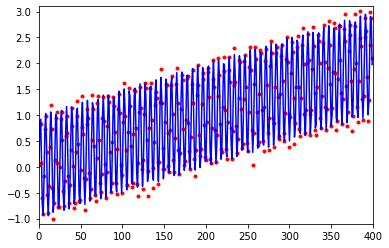

In [2]:
# 시계열 데이터 예측
data_time = np.sin(np.arange(400)) + np.random.normal(0, 0.1, 400) + np.arange(400)/200
print(data_time.shape)
plt.plot(data_time, 'r.')
plt.plot(range(400), np.sin(np.arange(400)) + np.arange(400)/200, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.1, 3.1)
plt.show()

## MLP

In [3]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(397, 4)
[[ 0.02928347  0.850883    0.82960901  0.08207668]
 [ 0.850883    0.82960901  0.08207668 -0.59267435]
 [ 0.82960901  0.08207668 -0.59267435 -0.90576247]
 ...
 [ 0.88441267  1.28702119  2.34837916  2.98301203]
 [ 1.28702119  2.34837916  2.98301203  2.88413698]
 [ 2.34837916  2.98301203  2.88413698  2.10421763]]


In [4]:
datax = data_matrix_np[:,0:3]
datay = data_matrix_np[:,3]
print(datax.shape)
print(datay.shape)

(397, 3)
(397,)


In [5]:
# Train Data와 Validation Data 분리
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 3)
(97, 3)
(300,)
(97,)


In [6]:
input_shape = (3,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 5, activation = 'tanh', input_shape = input_shape))
mlp_model.add(layers.Dense(units = 10, activation = 'tanh' ))
mlp_model.add(layers.Dense(units = 1, activation = 'linear'))

mlp_model.compile(optimizer="Adam", loss = "mean_squared_error", metrics = ['mean_squared_error'])


In [7]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 5ms/step - loss: 1.3024 - mean_squared_error: 1.3024 - val_loss: 2.8049 - val_mean_squared_error: 2.8049
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8224 - mean_squared_error: 0.8224 - val_loss: 1.9223 - val_mean_squared_error: 1.9223
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 0.6437 - mean_squared_error: 0.6437 - val_loss: 1.6484 - val_mean_squared_error: 1.6484
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 0.5478 - mean_squared_error: 0.5478 - val_loss: 1.5366 - val_mean_squared_error: 1.5366
Epoch 5/300
30/30 [==============================] - 0s 1ms/step - loss: 0.4758 - mean_squared_error: 0.4758 - val_loss: 1.5926 - val_mean_squared_error: 1.5926
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 0.4299 - mean_squared_error: 0.4299 - val_loss: 1.5425 - val_mean_squared_error: 1.5425
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.3690 - val_mean_squared_error: 0.3690
Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.3617 - val_mean_squared_error: 0.3617
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.2645 - val_mean_squared_error: 0.2645
Epoch 54/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3056 - val_mean_squared_error: 0.3056
Epoch 55/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.3087 - val_mean_squared_error: 0.3087
Epoch 56/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.3311 - val_mean_squared_error: 0.3311
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 2ms/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.2474 - val_mean_squared_error: 0.2474
Epoch 102/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.1827 - val_mean_squared_error: 0.1827
Epoch 103/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.2380 - val_mean_squared_error: 0.2380
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.2787 - val_mean_squared_error: 0.2787
Epoch 105/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 106/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.1980 - val_mean_squared_error: 0.1980
Epoch 152/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.1966 - val_mean_squared_error: 0.1966
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.2342 - val_mean_squared_error: 0.2342
Epoch 155/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 156/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 202/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 203/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1751 - val_mean_squared_error: 0.1751
Epoch 204/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 205/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.1920 - val_mean_squared_error: 0.1920
Epoch 206/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 252/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1662 - val_mean_squared_error: 0.1662
Epoch 253/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 254/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 255/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 256/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
Epoch 257/300
30/30 [===============

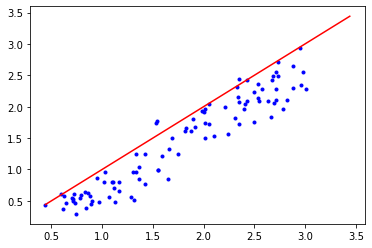

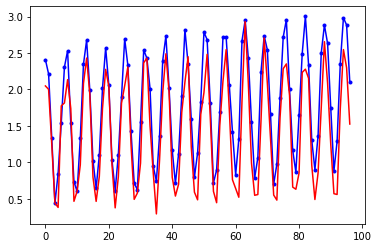

Final validation error is: %f 0.16372065246105194


In [19]:
plt.plot(tsty, mlp_model.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 0.5), np.arange(min(tsty), max(tsty)+0.5), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),mlp_model.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
#print("Final validation error is: %f" float() history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))

## RNN (Many-to-Many)
---

In [20]:
#Many-to-Many
batch_size = 10
sequence_length = 4
data_dim = 3

datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:3]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,3]
print(datax.shape)
print(datay.shape)

(396, 3)
(396,)


In [21]:
datax = np.reshape(datax,(-1,sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)

(99, 4, 3)
(99, 4, 1)


In [22]:
trnx = datax[0:70, :]
trny = datay[0:70]
tstx = datax[70:datax.shape[0],:]
tsty = datax[70:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(70, 4, 3)
(29, 4, 3)
(70, 4, 1)
(29, 4, 3)


In [23]:
# 입력 텐서
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [24]:
rnn_layer = layers.LSTM(10,return_sequences=True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1,activation='linear'))(rnn_layer)

In [26]:
# model compile
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer="Adam", loss='mean_squared_error',metrics=['mean_squared_error'])

In [27]:
model_mtom.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


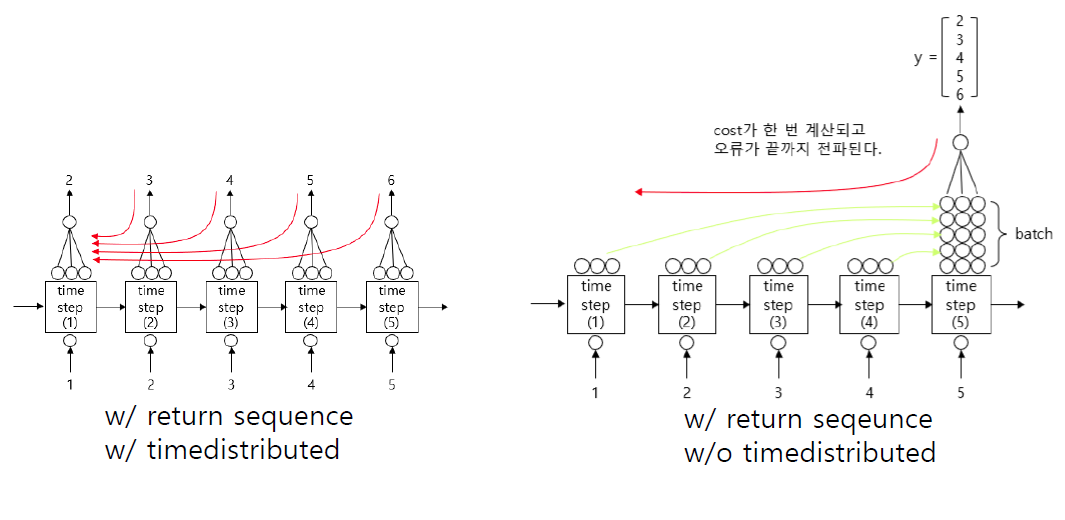